In [3]:
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt
import os

In [4]:
filename = 'emodat-Copy1.mat'
file = scipy.io.loadmat(filename)
n = 100
x = file['data']
x = x[0]
x = x[0:n]

Impulse Decomposition

In [5]:
def impulse_decomp(signal, sample_number):
    for i in range(0,n):
        globals()["id_" + str(i)] = np.zeros(n)
        globals()["id_" + str(i)][i]=signal[i]
    return globals()["id_" + str(sample_number)]

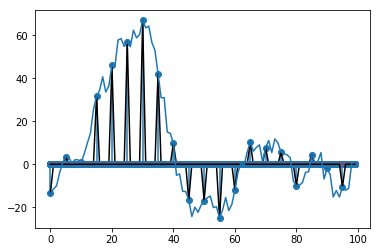

In [8]:
for i in range(0,n,5):
    plt.stem(impulse_decomp(x,i))
    plt.plot(impulse_decomp(x,i), color = 'k')
plt.plot(x)

Step Decomposition

In [59]:
def step_decomp(signal, sample_number):
    for i in range(0,n):
        globals()["id_" + str(i)] = np.zeros(n)
        globals()["id_" + str(i)][i:n]=signal[i]-signal[i-1]
    return globals()["id_" + str(sample_number)]

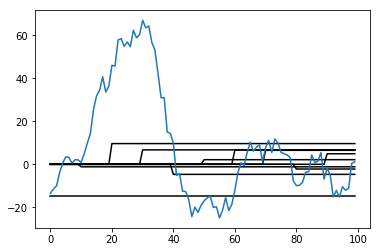

In [63]:
for i in range(0,n,10):
    plt.plot(step_decomp(x,i),color='k')
plt.plot(x)

Even/Odd Decomposition

In [72]:
def e_o_decomp(signal,choice):
    xe=np.zeros(n)
    xo=np.zeros(n)
    for i in range(1,n):
        xe[i]=(signal[i]+signal[n-i])/2
        xo[i]=(signal[i]-signal[n-i])/2
    if choice == 'even':
        return xe
    if choice == 'odd':
        return xo

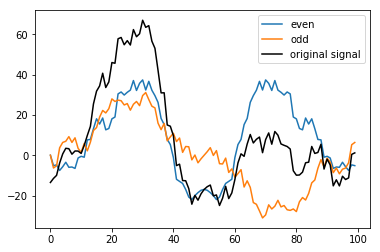

In [79]:
plt.plot(e_o_decomp(x,'even'),label = 'even')
plt.plot(e_o_decomp(x,'odd'), label = 'odd')
plt.plot(x, label = 'original signal', color = 'k')
plt.legend(loc='best')

Reconstruction

In [80]:
reconstructed = e_o_decomp(x,'even') + e_o_decomp(x,'odd')

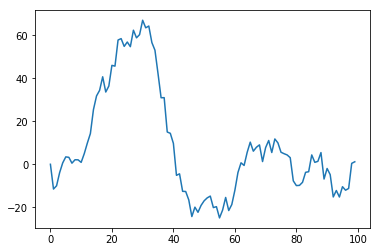

In [82]:
plt.plot(reconstructed)